# Probability & Statistics for EECS: Final Project

#### Members: 
* Name: Wu Shenrui  &  Student ID: 2023533166
* Name: Dai Qijun  &  Student ID: 2023531016

#### Contributions:
* We each made outstanding contributions to every problem, so please consider our contributions as equal.

# Part I

# Problem 1

Since each arm's parameter is oracled.
We choose the arm with the largest parameter for the maximum expectation of aggregate rewards over $ N $ time slots.

Since $ \theta_1 = 0.7, \theta_2 = 0.5, \theta_3 = 0.4 $,
choose arm 1 every time.

i.e.
$$I(t) = I^* = \arg \max_{j \in \{1,2,3\}} \theta_j = 1 $$
$$ \theta_{I(t)} = \theta_1 = 0.7 $$

So the maximum expected value is
$$ \max_{I(t), t=1,2,\ldots,N} E\left[\sum_{t=1}^{N} r_{I(t)}\right] $$
$$ = N \cdot \theta_{I^*} = 5000 \times 0.7 = 3500 $$

So above all, with the given oracle parameters, the maximum expected value is 3500.

# Problem 2

In [1]:
import numpy as np

N = 5000
true_thetas = [0.7, 0.5, 0.4]

def reward(arm):
    if np.random.rand() <= true_thetas[arm]:
        return 1
    else:
        return 0

## $\epsilon$-greedy

In [2]:
def greedy(epsilon, N):
    theta = [0, 0, 0]  # initialize the theta value of each arm
    count = [0, 0, 0]  # the count of each arm selecting

    total_reward = 0  
    
    for t in range(N):
        if np.random.rand() > epsilon:  
            arm = np.argmax(theta) 
        else: 
            arm = np.random.randint(0, 3)  
            
        r_i = reward(arm)
        total_reward += r_i  
            
        count[arm] += 1
            
        theta[arm] += (1 / count[arm]) * (r_i - theta[arm])
    
    return total_reward

greedy_reward_1 = greedy(0.1, N)
greedy_reward_2 = greedy(0.5, N)
greedy_reward_3 = greedy(0.9, N)

print("Total reward in greedy, case 1: ", greedy_reward_1)
print("Total reward in greedy, case 2: ", greedy_reward_2)
print("Total reward in greedy, case 3: ", greedy_reward_3)

Total reward in greedy, case 1:  3404
Total reward in greedy, case 2:  3027
Total reward in greedy, case 3:  2735


## UCB

In [3]:
def UCB(c, N):
    # initialization
    count = [0, 0, 0]  
    theta = [0, 0, 0]  
    total_reward = 0

    for t in range(N):  
        if t < 3:
            arm = t
            count[arm] = 1
            r_i = reward(arm)
            theta[arm] = r_i

        else:
            l = [theta[i] + c * np.sqrt((2 * np.log(t)) / count[i]) for i in range(3)]
            arm = np.argmax(l)
            r_i = reward(arm)
            count[arm] += 1
            theta[arm] += 1 / count[arm] * (r_i - theta[arm])  

        total_reward += r_i

    return total_reward 

UCB_reward_1 = UCB(1, N)
UCB_reward_2 = UCB(5, N)
UCB_reward_3 = UCB(10, N)

print("Total reward in UCB, case 1: ", UCB_reward_1)
print("Total reward in UCB, case 2: ", UCB_reward_2)
print("Total reward in UCB, case 3: ", UCB_reward_3)

Total reward in UCB, case 1:  3397
Total reward in UCB, case 2:  3035
Total reward in UCB, case 3:  2876


## TS

In [4]:
def TS(N, alpha_init, beta_init):
    alpha = np.array(alpha_init, dtype=float)
    beta = np.array(beta_init, dtype=float)

    total_reward = 0

    for t in range(N):
        for j in range(3):
            samples = np.array([np.random.beta(alpha[j], beta[j])])

        chosen_arm = np.argmax(samples)

        r_i = reward(chosen_arm)
        
        alpha[chosen_arm] += r_i
        beta[chosen_arm] += (1 - r_i)

        total_reward += r_i
    
    return total_reward

alpha_init_1 = [1, 1, 1]
beta_init_1 = [1, 1, 1]

TS_reward_1 = TS(N, alpha_init_1, beta_init_1)
print("Total reward in TS, case 1: ", TS_reward_1)

alpha_init_2 = [601, 401, 2]
beta_init_2  = [401, 601, 3]
    
TS_reward_2 = TS(N, alpha_init_2, beta_init_2)
print("Total reward in TS, case 2: ", TS_reward_2)




Total reward in TS, case 1:  3480
Total reward in TS, case 2:  3515


# Problem 3

In [5]:
trialNum = 200

## $\epsilon$-greedy

In [6]:
def run_greedy_experiments(experimentNum, trialNum, epsilon):
    total_reward = 0
    for _ in range(trialNum):
        total_reward += greedy(epsilon, experimentNum)
    return total_reward / trialNum


print("Average reward over 200 independent trials in greedy, case 1: ", run_greedy_experiments(N, trialNum, 0.1))

print("Average reward over 200 independent trials in greedy, case 2: ", run_greedy_experiments(N, trialNum, 0.5))

print("Average reward over 200 independent trials in greedy, case 2: ", run_greedy_experiments(N, trialNum, 0.9))

Average reward over 200 independent trials in greedy, case 1:  3416.075
Average reward over 200 independent trials in greedy, case 2:  3079.865
Average reward over 200 independent trials in greedy, case 2:  2751.055


## UCB

In [7]:
def run_UCB_experiments(experimentNum, trialNum, c):
    total_reward = 0
    for _ in range(trialNum):
        total_reward += UCB(c, experimentNum)
    return total_reward / trialNum

print("Average reward over 200 independent trials in UCB, case 1: ", run_UCB_experiments(N, trialNum, 1))

print("Average reward over 200 independent trials in UCB, case 2: ", run_UCB_experiments(N, trialNum, 5))

print("Average reward over 200 independent trials in UCB, case 2: ", run_UCB_experiments(N, trialNum, 10))

Average reward over 200 independent trials in UCB, case 1:  3411.07
Average reward over 200 independent trials in UCB, case 2:  2978.815
Average reward over 200 independent trials in UCB, case 2:  2827.345


## TS

In [13]:
def run_TS_experiments(experimentNum, trialNum, alpha_init, beta_init):
    total_reward = 0
    for _ in range(trialNum):
        total_reward += TS(experimentNum, alpha_init, beta_init)
    return total_reward / trialNum

print("Average reward over 200 independent trials in case 1: ", run_TS_experiments(N, trialNum, alpha_init_1, beta_init_1))

print("Average reward over 200 independent trials in case 2: ", run_TS_experiments(N, trialNum, alpha_init_2, beta_init_2))

Average reward over 200 independent trials in case 1:  3498.615
Average reward over 200 independent trials in case 2:  3503.66


# Problem 4 
## 1. Comparison
### The Epsilon-Greedy Algorithm


| Epsilon | Reward   | Gap |
|---------|----------|--------|
| 0.1     | 3416.05  | 83.95  |
| 0.5     | 3079.865  | 420.135|
| 0.9     | 2751.055 | 248.945|


### The UCB Algorithm

| c  | Reward   | Gap |
|----|----------|--------|
| 1  | 3411.07 | 90.2 |
| 5  | 2980.095  | 519.905|
| 10 | 2826.945  | 673.055|

### The Thompson Sampling Algorithm


| $ \alpha, \beta $ Setting | Reward   | Gap |
|----------------------------|----------|--------|
| (a1,b1)=(1, 1)(a2,b2)=(1,1)(a3,b3)=(1,1) | 3496.66 | 3.34 |
| (a1,b1)=(601,401)(a2,b2)=(401,601)(a3,b3)=(2,3) | 3502.085 | 2.085 |


## 2. Which one is the best?

Comparing all rewards among the experiments we have done, we could find that the Thompson Sampling algorithm is the best one.


## 3. Discussion on the impacts of $ e $, $ c $, and $ \alpha_j, \beta_j $ respectively.
### (1) Impact of $ \epsilon $ in the Epsilon-Greedy Algorithm

The parameter $ \epsilon $ in the Epsilon-Greedy algorithm controls the trade-off between exploration and exploitation:

- **Exploration**: With probability $ \epsilon $, the algorithm selects a random arm.
- **Exploitation**: With probability $ 1-\epsilon $, it selects the arm that has yielded the highest observed reward.
  
A larger $\epsilon$ encourages more random exploration of different arms to gain information about their expected rewards; however, if $\epsilon$ is too large, it may under-exploit the best arm.

A smaller $\epsilon$ mostly exploits the arm with the highest current estimate, but it might lead to insufficient exploration and get stuck at a suboptimal arm.

#### Impacts of Different $ \epsilon $ Values:
- **$ \epsilon = 0.1 $**: This value results in the highest reward among three different epsilon settings, as it strikes a good balance between exploration and exploitation, allowing the algorithm to converge on the optimal arm quickly while still occasionally exploring suboptimal arms.
- **$ \epsilon = 0.5 $**: With $ \epsilon $ set to 0.5, the algorithm spends more time exploring than $\epsilon$ set to 0.1, resulting in a lower reward because it spends less time exploiting the most promising arms.
- **$ \epsilon = 0.9 $**: A high value of $ \epsilon $ leads to excessive exploration and less exploitation, significantly reducing the reward, as the algorithm doesn’t sufficiently exploit the most promising arm.

#### Reflection
In practice, we shall **decay** $\epsilon$ over time, allowing more exploration early on and more exploitation later.

### (2) Impact of $ c $ in the UCB Algorithm

The UCB (Upper Confidence Bound) algorithm selects arms based on both the average reward of each arm and the uncertainty of each arm. The parameter $ c $ controls the trade-off between exploration and exploitation by influencing how much weight is given to the uncertainty of each arm.

- **Higher $ c $**: A larger $ c $ increases the exploration term in the UCB formula, making the algorithm more likely to explore arms with higher uncertainty, to give more chances to arms that have been pulled fewer times. Setting $c$ too high can lead to a **reduction in reward** as more resources are allocated to exploring less-optimal arms.
  - With $ c = 10 $, the reward is lower due to excessive exploration.
- **Lower $ c $**: A smaller $ c $ decreases the exploration term, making the algorithm more exploitative and less focused on exploration. This helps in concentrating on the arms that have been observed to yield higher rewards. 
  - With $ c = 1 $, the algorithm performs better (3409.8 reward), as it explores less and focuses more on exploiting the arms with higher observed rewards.
  - However, setting $c$ too small possibly overlooks arms that could be better but not sufficiently explored.

### (3) Impact of $ \alpha_j $ and $ \beta_j $ in the Thompson Sampling Algorithm
Thompson Sampling is like a Bayesian Method. In the Thompson Sampling (TS) algorithm, the parameters $ \alpha_j $ and $ \beta_j $ control the prior belief about the reward distribution for each arm. These parameters define the Beta distribution for the rewards of each arm, and the algorithm updates these parameters as it receives feedback (rewards): 
* if the pulling gets a reward successfully, $\alpha_j$ will increase by 1
* if the pulling fails to get a reward, $\beta_j$ will increase by 1

$\because$ The expected value of $Beta(\alpha_j, \beta_j)$ is $\frac{\alpha_j}{\alpha_j + \beta_j}$

$\therefore$ As the number of pullings increases, the expected value will get closer to the real success probability of each arm, and we will be more likely to pull the arm with higher success probability under the impact of $\alpha_j$ and $\beta_j$

* if $\alpha_j$ and $\beta_j$ are initially small(e.g., $ \alpha = 1, \beta = 1, j = 1,2,3 $ in the first case of problem 2), it indicates that the algorithm has little prior recognition about the arm's reward, leading to more exploration initially. As the algorithm receives rewards, it updates $ \alpha_j $ and $ \beta_j $ of the arm using the Beta-Binomial conjugacy, refining the belief about the arm's reward and focusing more on the arms that seem to provide higher rewards.

* if $\alpha_j$ and $\beta_j$ are initially large, it indicates that the algorithm has strong prior recognition about the arm's reward, leading to initially more pullings on this arm if $\frac{\alpha_j}{\alpha_j + \beta_j}$ is relatively large and less pullings on this arm if $\frac{\alpha_j}{\alpha_j + \beta_j}$ is relatively small. However, as the algorithm receives rewards, it will still update $ \alpha_j $ and $ \beta_j $ of the arm using the Beta-Binomial conjugacy, refining the belief about the arm's reward and focusing more on the arms that seem to provide higher rewards.

If $\alpha_j$ and $\beta_j$ are initially large and $\frac{\alpha_j}{\alpha_j + \beta_j}$ is relatively large for the arm which has relatively large real success probability, we tend to get a better result.

Also, if $\alpha_j$ and $\beta_j$ are initially large and $\frac{\alpha_j}{\alpha_j + \beta_j}$ is relatively small for the arm which has relatively small real success probability, we tend to get a better result.

# Problem 5
# (1) Fundamentals of the Exploration-Exploitation Trade-Off

## Understanding the Exploration-Exploitation Trade-Off

The exploration-exploitation trade-off is a fundamental challenge in multi-armed bandit (MAB) algorithms, capturing the delicate balance between two competing goals during decision-making:

### **1. Exploration**
Exploration involves selecting less-known or suboptimal actions (arms) to gather more information about their potential rewards. The primary goal of exploration is to reduce uncertainty about the environment and discover better-performing options that may not initially seem promising.

- **Benefits of Exploration:**
  - It allows the algorithm to uncover options that may have been underestimated or overlooked due to insufficient information.
  - In stochastic environments, exploration ensures that the algorithm doesn't prematurely commit to suboptimal arms, which could lead to better long-term performance.

- **Risks of Exploration:**
  - Since exploration involves experimenting with potentially suboptimal choices, it often results in lower short-term rewards.
  - Excessive exploration can waste resources (time or trials) on arms that ultimately provide poor rewards.


### **2. Exploitation**
Exploitation, on the other hand, focuses on selecting the action that appears to be the best based on the knowledge acquired so far. It seeks to maximize immediate rewards by taking advantage of what the algorithm has already learned.

- **Benefits of Exploitation:**
  - It enables the algorithm to capitalize on known high-reward options, achieving better short-term gains.
  - As more information is gathered, exploitation helps the algorithm converge to an optimal or near-optimal solution.

- **Risks of Exploitation:**
  - Overemphasis on exploitation can lead to "premature convergence," where the algorithm becomes stuck in a local optimum and fails to discover better-performing arms.
  - In dynamic or uncertain environments, relying solely on exploitation risks ignoring changes in the reward distribution.


### **The Core Conflict**
The exploration-exploitation trade-off arises from the inherent tension between these two goals. Exploration requires sacrificing short-term rewards to gather information for potential long-term benefits, while exploitation focuses on maximizing immediate rewards at the risk of missing better options in the future. Striking the right balance between these two approaches is critical for the success of multi-armed bandit algorithms.

A well-designed algorithm must determine **how much to explore** and **when to exploit** in a way that maximizes the overall cumulative reward.




### **Exploration-Exploitation in Different Bandit Algorithms**

1. **Epsilon-Greedy Algorithm:**
   - The epsilon-greedy algorithm explicitly defines a trade-off between exploration and exploitation using the parameter $ \epsilon $:
     - With probability $ \epsilon $, the algorithm explores by randomly selecting an arm.
     - With probability $ 1 - \epsilon $, the algorithm exploits by choosing the best-known arm based on current information.
   - **Impact of $ \epsilon $:**
     - A small $ \epsilon $ prioritizes exploitation, leading to higher short-term rewards but risks under-exploring potentially better options.
     - A large $ \epsilon $ emphasizes exploration, ensuring more arms are tried but may result in lower short-term rewards.


2. **UCB (Upper Confidence Bound) Algorithm:**
   - The UCB algorithm balances exploration and exploitation dynamically by considering both the estimated reward and the uncertainty (confidence interval) for each arm:
     - Arms with high uncertainty are prioritized for exploration.
     - Arms with high estimated rewards are favored for exploitation.
   - This approach ensures that arms with insufficient trials are explored more frequently, while well-tested arms are exploited.
   - **Key Advantage:** The UCB algorithm naturally adjusts the exploration-exploitation balance without needing explicit parameters like $ \epsilon $. However, it may perform less effectively in non-stationary environments.

3. **Thompson Sampling Algorithm:**
   - Thompson Sampling employs a Bayesian approach to balance exploration and exploitation:
     - Each arm is associated with a reward distribution, which is updated based on observed outcomes.
     - At each step, the algorithm samples from these distributions and selects the arm with the highest sampled value.
   - This method inherently balances exploration and exploitation:
     - Arms with higher uncertainty are sampled more often (exploration).
     - Arms with higher expected rewards are more likely to be chosen (exploitation).
   - **Key Advantage:** Thompson Sampling is adaptive and performs well in both stationary and non-stationary environments. It tends to achieve near-optimal long-term rewards.





# (2) The Dynamics of Exploration-Exploitation and Behavior Under Different Parameters and Time Horizons

## Dynamic Nature of the Trade-Off
The balance between exploration and exploitation often evolves over time:

- **Early Stages:** Exploration is typically prioritized to gain a broad understanding of the reward distributions for all available arms.
- **Later Stages:** As more data is collected and uncertainty decreases, exploitation becomes more dominant to maximize cumulative rewards.

This dynamic adjustment ensures that the algorithm collects sufficient information initially but eventually converges to the optimal solution.



## Key Challenges and Strategies
Balancing exploration and exploitation is not straightforward and depends on several factors:

- **Time Horizon:** In shorter time horizons, exploitation is often prioritized to maximize immediate rewards. In longer horizons, exploration becomes more critical to identify optimal arms.
- **Uncertainty in Rewards:** Greater uncertainty necessitates more exploration to refine estimates of rewards.
- **Dynamic Environments:** In changing environments, continuous exploration is needed to adapt to new reward distributions.

To address these challenges, algorithms often adopt strategies such as:
- **Adaptive Parameters:** Dynamically adjusting exploration and exploitation levels based on the stage of the process (e.g., decaying $ \epsilon $ in epsilon-greedy or adjusting confidence intervals in UCB).
- **Reward Models:** Incorporating prior knowledge or Bayesian methods (as in Thompson Sampling) to intelligently guide the trade-off.


## Conclusion
The exploration-exploitation trade-off is the cornerstone of multi-armed bandit problems. An effective balance ensures that the algorithm gathers enough information to make informed decisions while also maximizing cumulative rewards. Each algorithm approaches this trade-off differently, with varying strengths and weaknesses. Understanding the nature of the problem, the reward distribution, and the time horizon is crucial for selecting the appropriate algorithm and achieving optimal performance.

# Problem 6

Our algorithm is modified from TS, modification is when an arm is pulled:
1. if we successfully get a reward, then we increase the $\alpha_j$ of this arm by 1 and we also decrease the $\alpha_j$ of other two arms by $\frac{1}{2}$ respectively
2. if we fail to get a reward, then we increase the $\beta_j$ of this arm by 1 and we also increase the $\beta_j$ of other two arms by $\frac{1}{2}$ respectively

Through the design above, the expected value of Beta distribution for each arm will converge to the real success probability of each arm more quickly, therefore we would get a better result.

The parameters settings are the same as the parameters settings of TS algorithm in the previous problems.

In [15]:
def TS_dependent(N, alpha_init, beta_init):
    alpha = np.array(alpha_init, dtype=float)
    beta = np.array(beta_init, dtype=float)

    total_reward = 0

    for t in range(N):
        for j in range(3):
            samples = np.array([np.random.beta(alpha[j], beta[j])])

        chosen_arm = np.argmax(samples)

        r_i = reward(chosen_arm)
        
        for arm in range(3):
            if (arm == chosen_arm):
                alpha[arm] += r_i
                beta[arm] += (1 - r_i)
            else:
                alpha[arm] += (1 - r_i) / 2
                beta[arm] += r_i / 2

        total_reward += r_i
    
    return total_reward

alpha_init_1 = [1, 1, 1]
beta_init_1 = [1, 1, 1]

alpha_init_2 = [601, 401, 2]
beta_init_2  = [401, 601, 3]

def run_TS_dependent(experimentNum, trialNum, alpha_init, beta_init):
    total_reward = 0
    for _ in range(trialNum):
        total_reward += TS_dependent(experimentNum, alpha_init, beta_init)
    return total_reward / trialNum

print("Average reward over 200 independent trials in case 1: ", run_TS_dependent(N, trialNum, alpha_init_1, beta_init_1))

print("Average reward over 200 independent trials in case 2: ", run_TS_dependent(N, trialNum, alpha_init_2, beta_init_2))
    

Average reward over 200 independent trials in case 1:  3499.45
Average reward over 200 independent trials in case 2:  3499.135


# Part II

# Problem 1

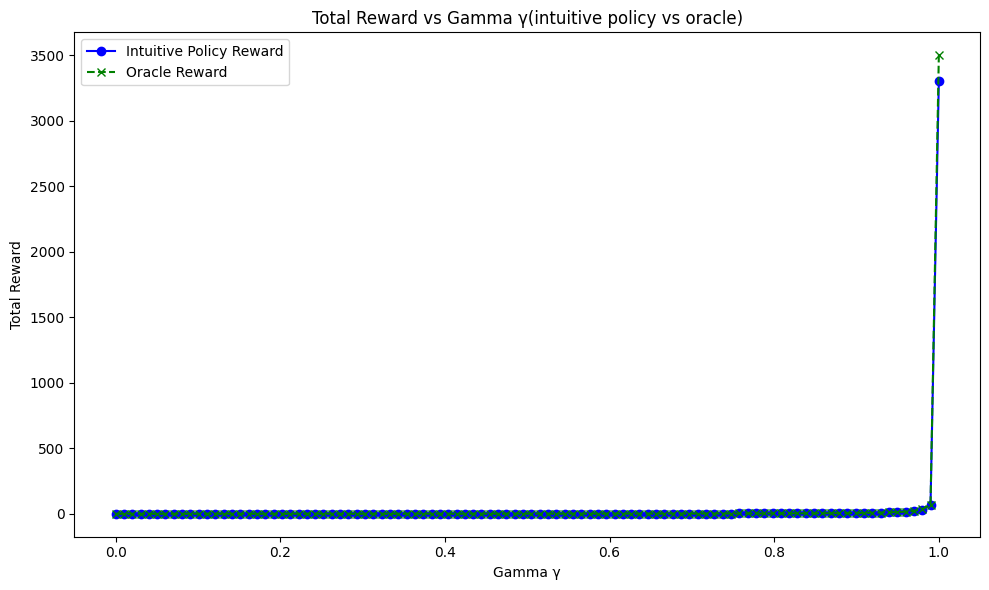

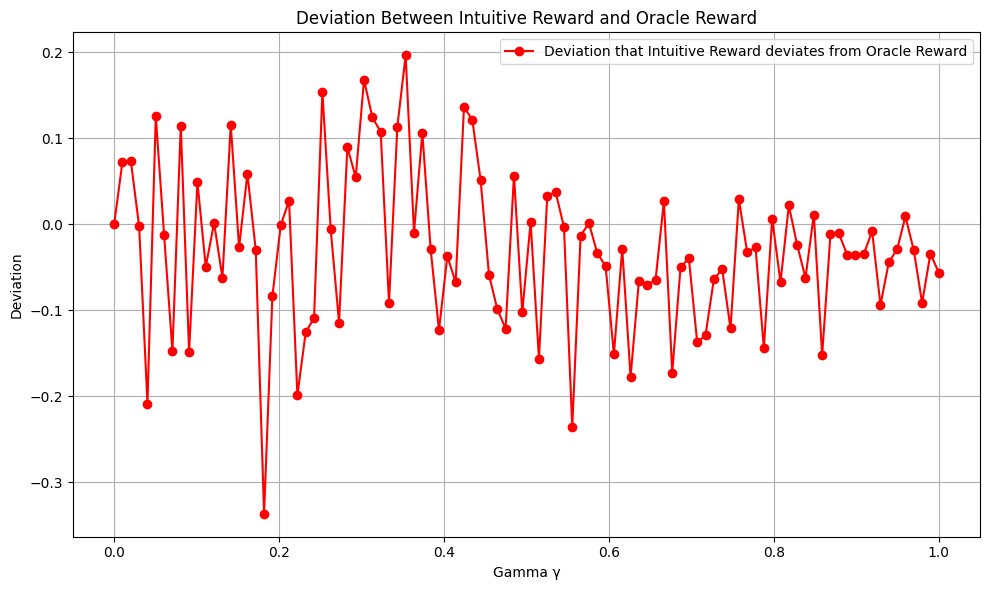

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def get_reward(arm, theta):
    return 1 if np.random.rand() <= theta[arm] else 0 
# return reward based on the chosen arm and corresponding theta

def update_parameters(alpha, beta, arm, reward):
    if reward == 1:
        alpha[arm] += 1
    else:
        beta[arm] += 1
    return alpha, beta

def select_best_arm(alpha, beta):
    expected_values = [alpha[i] / (alpha[i] + beta[i]) for i in range(2)]
    return np.argmax(expected_values)

def simulate_policy(alpha, beta, gamma, true_theta, time_steps): 
    # N pullings under the intuitive policy and return the total reward
    gamma_pow = 1
    cumulative_reward = 0

    for t in range(1, time_steps + 1):
        arm = select_best_arm(alpha, beta)
        
        reward = get_reward(arm, true_theta)
        
        alpha, beta = update_parameters(alpha, beta, arm, reward)
        
        cumulative_reward += reward * gamma_pow
        gamma_pow *= gamma  

    return cumulative_reward

def calculate_oracle_reward(gamma, true_theta, time_steps):
    best_arm = np.argmax(true_theta)  
    theta_best = true_theta[best_arm]
    if gamma < 1.0:
        # Geometric series sum: theta_best * (1 - gamma^time_steps) / (1 - gamma)
        oracle_reward = theta_best * (1 - gamma**time_steps) / (1 - gamma)
    else:
        # when gamma = 1
        oracle_reward = theta_best * time_steps
    return oracle_reward

# run simulations, calculate average rewards, oracle rewards and deviations(simulation result deviates from oracle result) under different gamma values
def run_simulations(alpha_init, beta_init, gamma_values, true_theta, time_steps, repeat_time):
    average_total_rewards = []
    oracle_rewards = []
    deviation_list = []

    for gamma in gamma_values:
        total_rewards = []  # store total reward of each trial
        
        for trial in range(repeat_time):
            alpha = alpha_init.copy()
            beta = beta_init.copy()
            
            cumulative_reward = simulate_policy(alpha, beta, gamma, true_theta, time_steps)
            total_rewards.append(cumulative_reward)
        
        avg_reward = np.mean(total_rewards) # take average value of total rewards in repeated trials
        average_total_rewards.append(avg_reward)

        oracle_reward = calculate_oracle_reward(gamma, true_theta, time_steps)
        oracle_rewards.append(oracle_reward)
        deviation = (avg_reward - oracle_reward) / oracle_reward
        deviation_list.append(deviation)

    return average_total_rewards, oracle_rewards, deviation_list

def plot_results(gamma_values, intuitive_rewards, oracle_rewards, deviation_values): # plot the results of intuitive policy rewards, oracle rewards and deviations
    
    # Comparison between intuitive policy reward and oracle reward 
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values, intuitive_rewards, marker='o', linestyle='-', color='blue', label="Intuitive Policy Reward")
    plt.plot(gamma_values, oracle_rewards, marker='x', linestyle='--', color='green', label="Oracle Reward")
    plt.title('Total Reward vs Gamma γ(intuitive policy vs oracle)')
    plt.xlabel('Gamma γ')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Deviation
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values, deviation_values, marker='o', linestyle='-', color='red', label="Deviation that Intuitive Reward deviates from Oracle Reward")
    plt.title('Deviation Between Intuitive Reward and Oracle Reward')
    plt.xlabel('Gamma γ')
    plt.ylabel('Deviation')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Initialization
alpha_init = [1, 1]  
beta_init = [1, 1]   
true_theta = [0.7, 0.5]  
gamma_values = np.linspace(0, 1, 100)  
time_steps = 5000 
repeat_time = 20

intuitive_rewards, oracle_rewards, deviation_values = run_simulations(alpha_init, beta_init, gamma_values, true_theta, time_steps, repeat_time)

plot_results(gamma_values, intuitive_rewards, oracle_rewards, deviation_values)


Initialization is:

1. the success probabilities of arm 1 and arm 2 to be 0.7 and 0.5 respectively
2. the parameters of Beta prior distribution are all set to 1
3. we do 5000 pullings in every trial
4. repeat the trial 20 times and take average to avoid randomness

The deviation is the deviation proportion of simulations' average reward from the oracle reward.
* deviation =  $\frac{\text{average reward - oracle reward}}{\text{oracle reward}}$

And from the results shown above, we could find the behaviors of the intuitive policy are very good in most cases
* the two total rewards curves of simulation result and oracle result(the theoretically maximized aggregate rewards) are closely aligned
* basically all deviation proportions don't exceed ±0.3 and in many cases the deviation proportions are around 0.

# Problem 2

The **intuitive policy** typically selects the arm with the highest expected value (i.e., the arm with the highest mean of its Beta distribution) at each step. This method behaves good in most cases but is **not optimal**, because **exploration** is important in the early stages of the process but intuitive policy tends to exploit the current knowledge, which often results in it sticking to a suboptimal arm in a long time, especially when the initial exploration is not sufficient.

We still initialize:
1. the success probabilities of arm 1 and arm 2 to be 0.7 and 0.5 respectively
2. the parameters of Beta prior distribution are all set to 1
3. we do 5000 pullings in every trial
4. repeat the trial 20 times and take average to avoid randomness

And we will compare the intuitive policy with the Thompson Sampling method on the arm selectings to show the intuitive policy is not optimal.

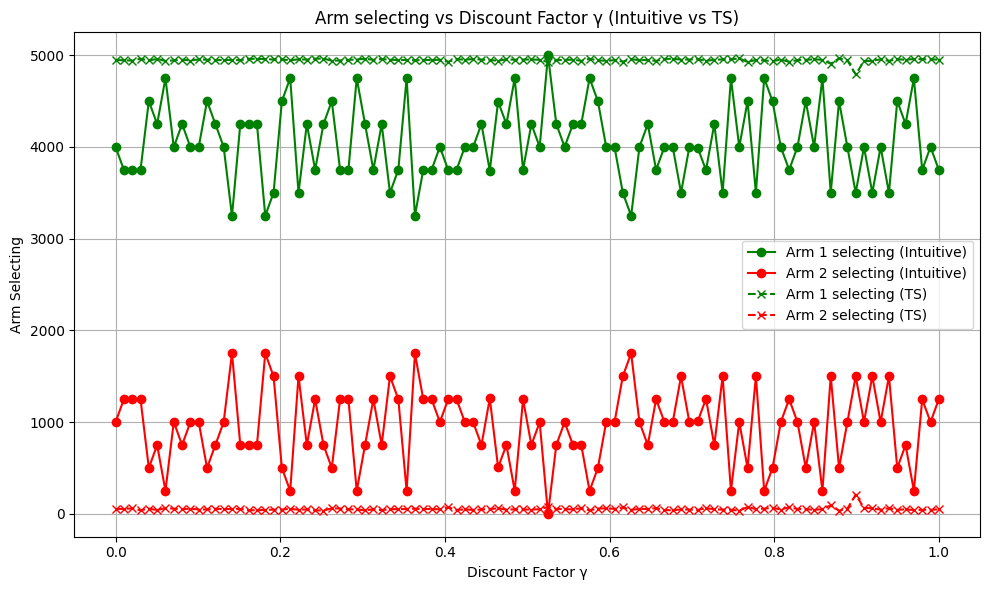

In [11]:
def select_best_arm_thompson(alpha, beta):
    theta_samples = [np.random.beta(alpha[i], beta[i]) for i in range(2)]
    return np.argmax(theta_samples)

def simulate_policy_with_TS(alpha, beta, true_theta, time_steps, use_thompson=False):
    # pull N times based on intuitive policy or TS
    cumulative_arm_selecting = [0, 0]

    for t in range(1, time_steps + 1):
        if use_thompson:
            arm = select_best_arm_thompson(alpha, beta)
        else:
            arm = select_best_arm(alpha, beta)
        
        reward = get_reward(arm, true_theta)

        cumulative_arm_selecting[arm] += 1
        
        alpha, beta = update_parameters(alpha, beta, arm, reward)

    cumulative_arm_1_selecting = cumulative_arm_selecting[0]
    cumulative_arm_2_selecting = cumulative_arm_selecting[1]

    return cumulative_arm_1_selecting, cumulative_arm_2_selecting

# run simulations, calculate average rewards, oracle rewards and deviations(simulation result deviates from oracle result) under different gamma values
def run_simulations_with_TS(alpha_init, beta_init, gamma_values, true_theta, time_steps, repeat_time, use_thompson=False):
    arm_1_selecting = []
    arm_2_selecting = []

    for gamma in gamma_values:  
        total_arm_1_selectings = [] # store total arm selectings of each trial
        total_arm_2_selectings = []
        
        for trial in range(repeat_time):
            alpha = alpha_init.copy()
            beta = beta_init.copy()
            
            cumulative_arm_1_selecting, cumulative_arm_2_selecting = simulate_policy_with_TS(alpha, beta, true_theta, time_steps, use_thompson)
            total_arm_1_selectings.append(cumulative_arm_1_selecting)
            total_arm_2_selectings.append(cumulative_arm_2_selecting)
        
        avg_arm_1_selecting = np.mean(total_arm_1_selectings) # take average value of total arm selectings in repeated trials
        avg_arm_2_selecting = np.mean(total_arm_2_selectings)

        arm_1_selecting.append(avg_arm_1_selecting)
        arm_2_selecting.append(avg_arm_2_selecting)

    return arm_1_selecting, arm_2_selecting

def plot_comparison_results(gamma_values, arm_1_selecting_intuitive, arm_2_selecting_intuitive, arm_1_selecting_TS, arm_2_selecting_TS):

    # plot arm_selecting comparison between intuitive policy and TS
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values, arm_1_selecting_intuitive, marker='o', linestyle='-', color='green', label="Arm 1 selecting (Intuitive)")
    plt.plot(gamma_values, arm_2_selecting_intuitive, marker='o', linestyle='-', color='red', label="Arm 2 selecting (Intuitive)")
    plt.plot(gamma_values, arm_1_selecting_TS, marker='x', linestyle='--', color='green', label="Arm 1 selecting (TS)")
    plt.plot(gamma_values, arm_2_selecting_TS, marker='x', linestyle='--', color='red', label="Arm 2 selecting (TS)")
    plt.title('Arm selecting vs Discount Factor γ (Intuitive vs TS)')
    plt.xlabel('Discount Factor γ')
    plt.ylabel('Arm Selecting')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


# initialization
alpha_init = [1, 1] 
beta_init = [1, 1]  
true_theta = [0.7, 0.5] 
gamma_values = np.linspace(0, 1, 100) 
time_steps = 5000 
repeat_time = 20 

arm_1_selecting_intuitive, arm_2_selecting_intuitive = run_simulations_with_TS(alpha_init, beta_init, gamma_values, true_theta, time_steps, repeat_time, use_thompson=False)

arm_1_selecting_TS, arm_2_selecting_TS = run_simulations_with_TS(alpha_init, beta_init, gamma_values, true_theta, time_steps, repeat_time, use_thompson=True)

plot_comparison_results(gamma_values, arm_1_selecting_intuitive, arm_2_selecting_intuitive, arm_1_selecting_TS, arm_2_selecting_TS)

From the result shown above, we could find, nearly in all cases, TS method selects arm 1 more than intuitive policy in 5000 pullings.

As we all know, the optimal policy should select arm 1 in one trial as many as possible. Therefore, we've shown the intuitive policy is not optimal under the help of TS.

# Problem 3

$ R_1(\alpha_1, \beta_1) $ indicates the total expected reward if pull arm 1 at $ t = 1 $. $ R_2(\alpha_2, \beta_2) $ indicates the total expected reward if pull arm 2 at $ t = 1 $. $ R(\alpha_1, \beta_1, \alpha_2, \beta_2) $ is the expected total reward under an optimal policy. There are two choices at first: pulling arm 1 or 2. So the maximum reward with these beta parameters is the greater one between pulling arm 1 and 2. Hence,

$
R(\alpha_1, \beta_1, \alpha_2, \beta_2) = \max\{ R_1(\alpha_1, \beta_1), R_2(\alpha_2, \beta_2) \}
$

At time zero, each $\theta_i$ has a Beta prior distribution with two parameters $\alpha_i$, $\beta_i$, $i = 1,2$, and these distributions are independent for the two arms.

W.L.O.G, we pull the arm 1 at $1$-th time.

The success distribution is $Bern(\theta_1)$.

So we will get a reward 1 with success of probability $\theta_1$, and fail to get a reward with failure of probability $1 - \theta_1$.

By Beta-Binomial conjugate, the posterior distribution of $\theta_1$ is Beta distribution $Beta(\alpha_1 + 1, \beta_1)$ if success, and $Beta(\alpha_1, \beta_1 + 1)$ if failure at $1$-th time. 

So the next steps' rewards are $\gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2)$ if success at $1$-th time, and $\gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2)$ if failure at $1$-th time, considering the future's reward will receive a discount $\gamma$ for each time.

Hence,

$
R_1(\alpha_1, \beta_1) = \mathbb{E}\left(\theta_1 \left[1 + \gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2)\right] + (1 - \theta_1)\left[\gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2)\right]\right)
$

$\Rightarrow$

$
R_1(\alpha_1, \beta_1) = \frac{\alpha_1}{\alpha_1 + \beta_1}\left[1 + \gamma R(\alpha_1 + 1, \beta_1, \alpha_2, \beta_2)\right] + \frac{\beta_1}{\alpha_1 + \beta_1}\left[\gamma R(\alpha_1, \beta_1 + 1, \alpha_2, \beta_2)\right]
$

Similarly,

$
R_2(\alpha_2, \beta_2) = \frac{\alpha_2}{\alpha_2 + \beta_2}\left[1 + \gamma R(\alpha_1, \beta_1, \alpha_2 + 1, \beta_2)\right] + \frac{\beta_2}{\alpha_2 + \beta_2}\left[\gamma R(\alpha_1, \beta_1, \alpha_2, \beta_2+1)\right]
$

Therefore, the recurrence equation holds!

# Problem 4 & 5

We could solve the equations by recursively calling the function defined as below
* We use a dictionary to store the value of the states we have already calculated, then we won't calculate the identical states too many times

And the optimal policy for how to choose the arm in every state is $I^* = \argmax \{R_1(\alpha_1,\beta_1),R_2(\alpha_2,\beta_2)\}$, if $I^* = 0$, then we choose the arm 1 at this state; else if $I^* = 1$, then we choose the arm 2 at this state.
* This policy has been used in the function below!

In [16]:

def R(alpha1, beta1, alpha2, beta2, gamma, count, dict):
    if ((alpha1, beta1, alpha2, beta2) in dict):
        return dict[(alpha1, beta1, alpha2, beta2)]

    R1 = alpha1 / (alpha1 + beta1) * (1 + gamma * R(alpha1 + 1, beta1, alpha2, beta2, gamma, count + 1, dict)) \
        + beta1 / (alpha1 + beta1) * (gamma * R(alpha1, beta1 + 1, alpha2, beta2, gamma, count + 1, dict))

    R2 = alpha2 / (alpha2 + beta2) * (1 + gamma * R(alpha1, beta1, alpha2 + 1, beta2, gamma, count + 1, dict)) \
        + beta2 / (alpha2 + beta2) * (gamma * R(alpha1, beta1, alpha2, beta2 + 1, gamma, count + 1, dict))
    
    reward = max(R1, R2)

    dict[(alpha1, beta1, alpha2, beta2)] = reward

    return reward

def run_optimal(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma_values, true_theta):
    optimal_rewards = []
    oracle_rewards = []
    deviations = []

    for gamma in gamma_values:
        optimal_reward = R(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma, 0, {})
        optimal_rewards.append(optimal_reward)
        oracle_reward = calculate_oracle_reward(gamma, true_theta, 5000)
        oracle_rewards.append(oracle_reward)
        deviation = (optimal_reward - oracle_reward) / oracle_reward
        deviations.append(deviation)
    
    return optimal_rewards, oracle_rewards, deviations

def plot_optimal_results(gamma_values, optimal_rewards, oracle_rewards, deviations): # plot the results of optimal rewards, oracle rewards and deviations
    
    # Optimal Reward and Oracle Reward
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values, optimal_rewards, marker='o', linestyle='-', color='blue', label="Optimal Reward")
    plt.plot(gamma_values, oracle_rewards, marker='x', linestyle='--', color='green', label="Oracle Reward")
    plt.title('Optimal Reward vs Gamma γ')
    plt.xlabel('Gamma γ')
    plt.ylabel('Optimal Reward')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Deviation
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values,deviations, marker='o', linestyle='-', color='red', label="Deviation that Optimal Reward deviates from Oracle Reward")
    plt.title('Deviations Between Oracle Reward and Optimal Reward')
    plt.xlabel('Gamma γ')
    plt.ylabel('Deviation')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Initialization
alpha_1_init = 1  
beta_1_init = 1
alpha_2_init = 1
beta_2_init = 1   
true_theta = [0.7, 0.5]  
gamma_values = np.linspace(0, 1, 100)  

optimal_rewards, oracle_rewards, deviations = run_optimal(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma_values, true_theta)

plot_optimal_results(gamma_values, optimal_rewards, oracle_rewards, deviations)

We tried running the optimal algorithm above to get the optimal rewards and compare them with the oracle rewards(use deviations).

However, we find the number of states could be infinity, so the recursion won't stop!

Therefore, we find a way to solve this problem:
* We set a limitation for the pulling count, if the pulling count is large enough, then ideally the expected values of Beta distributions for each arm, $\frac{\alpha_1}{\alpha_1 + \beta_1}$ and $\frac{\alpha_2}{\alpha_2 + \beta_2}$ are close to the real success probabilities of the two arms. Therefore, when the pulling count is up to the limitation, we replace $R(\alpha_1, \beta_1, \alpha_2, \beta_2)$ with the larger expected value, which means we choose the corresponding arm at that state and get the corresponding expected value of reward(we eliminate the item containing $\gamma$ because the exponential of $\gamma$ is small enough if the pulling count is large)

In this way, we could solve this problem approximately but not exactly!

In [ ]:
def R(alpha1, beta1, alpha2, beta2, gamma, count, dict):
    if ((alpha1, beta1, alpha2, beta2) in dict):
        return dict[(alpha1, beta1, alpha2, beta2)]
    
    if (count > 1000):
        mean1 = alpha1 / (alpha1 + beta1)
        mean2 = alpha2 / (alpha2 + beta2)
        return max(mean1, mean2)

    R1 = alpha1 / (alpha1 + beta1) * (1 + gamma * R(alpha1 + 1, beta1, alpha2, beta2, gamma, count + 1, dict)) \
        + beta1 / (alpha1 + beta1) * (gamma * R(alpha1, beta1 + 1, alpha2, beta2, gamma, count + 1, dict))

    R2 = alpha2 / (alpha2 + beta2) * (1 + gamma * R(alpha1, beta1, alpha2 + 1, beta2, gamma, count + 1, dict)) \
        + beta2 / (alpha2 + beta2) * (gamma * R(alpha1, beta1, alpha2, beta2 + 1, gamma, count + 1, dict))
    
    reward = max(R1, R2)

    dict[(alpha1, beta1, alpha2, beta2)] = reward

    return reward

def run_optimal(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma_values, true_theta):
    optimal_rewards = []
    oracle_rewards = []
    deviations = []

    for gamma in gamma_values:
        optimal_reward = R(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma, 0, {})
        optimal_rewards.append(optimal_reward)
        oracle_reward = calculate_oracle_reward(gamma, true_theta, 5000)
        oracle_rewards.append(oracle_reward)
        deviation = (optimal_reward - oracle_reward) / oracle_reward
        deviations.append(deviation)
    
    return optimal_rewards, oracle_rewards, deviations

def plot_optimal_results(gamma_values, optimal_rewards, oracle_rewards, deviations): # plot the results of optimal rewards, oracle rewards and deviations
    
    # Optimal Reward and Oracle Reward
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values, optimal_rewards, marker='o', linestyle='-', color='blue', label="Optimal Reward")
    plt.plot(gamma_values, oracle_rewards, marker='x', linestyle='--', color='green', label="Oracle Reward")
    plt.title('Optimal Reward vs Gamma γ')
    plt.xlabel('Gamma γ')
    plt.ylabel('Optimal Reward')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Deviation
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values,deviations, marker='o', linestyle='-', color='red', label="Deviation that Optimal Reward deviates from Oracle Reward")
    plt.title('Deviations Between Oracle Reward and Optimal Reward')
    plt.xlabel('Gamma γ')
    plt.ylabel('Deviation')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Initialization
alpha_1_init = 1  
beta_1_init = 1
alpha_2_init = 1
beta_2_init = 1   
true_theta = [0.7, 0.5]  
gamma_values = np.linspace(0, 1, 100)  

optimal_rewards, oracle_rewards, deviations = run_optimal(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma_values, true_theta)

plot_optimal_results(gamma_values, optimal_rewards, oracle_rewards, deviations)

However, we find memory exceeded because the depth of recursion is too deep.

So we adjust the count limitation to 50, with which we could get a simulation result, but the result won't be so good because of the too small pulling count.

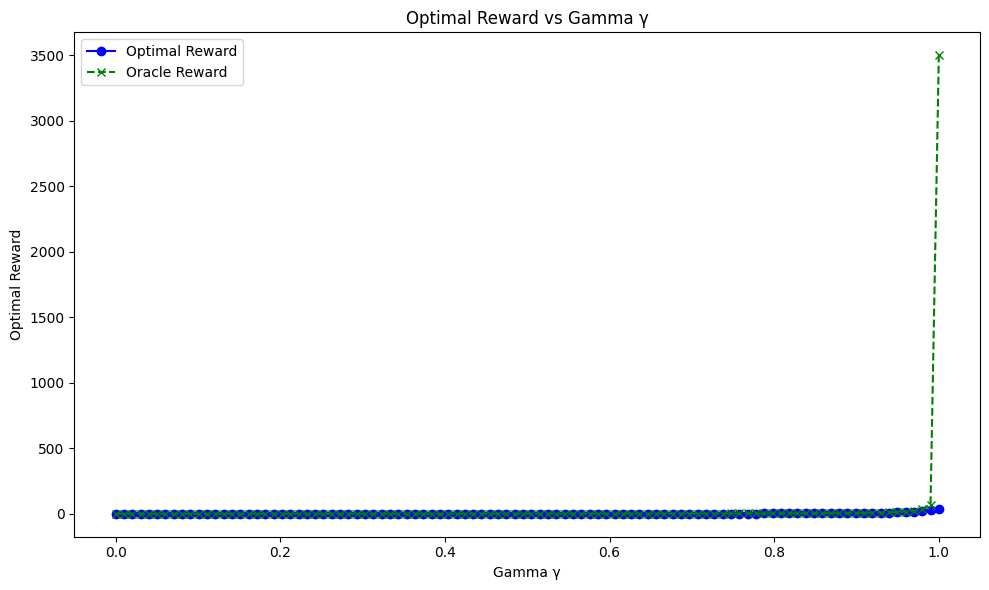

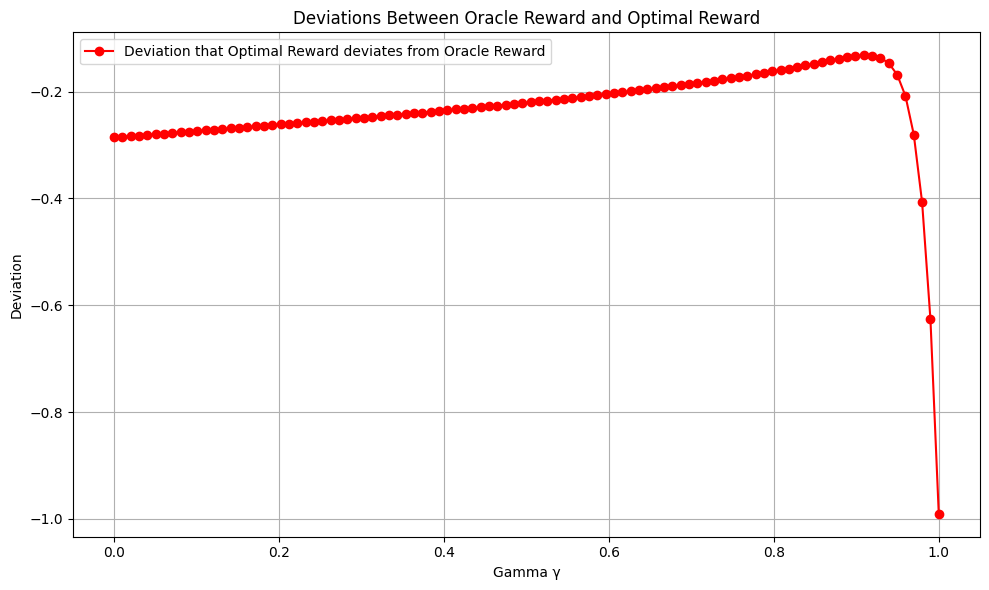

In [17]:
def R(alpha1, beta1, alpha2, beta2, gamma, count, dict):
    if ((alpha1, beta1, alpha2, beta2) in dict):
        return dict[(alpha1, beta1, alpha2, beta2)]
    
    if (count > 50):
        mean1 = alpha1 / (alpha1 + beta1)
        mean2 = alpha2 / (alpha2 + beta2)
        return max(mean1, mean2)

    R1 = alpha1 / (alpha1 + beta1) * (1 + gamma * R(alpha1 + 1, beta1, alpha2, beta2, gamma, count + 1, dict)) \
        + beta1 / (alpha1 + beta1) * (gamma * R(alpha1, beta1 + 1, alpha2, beta2, gamma, count + 1, dict))

    R2 = alpha2 / (alpha2 + beta2) * (1 + gamma * R(alpha1, beta1, alpha2 + 1, beta2, gamma, count + 1, dict)) \
        + beta2 / (alpha2 + beta2) * (gamma * R(alpha1, beta1, alpha2, beta2 + 1, gamma, count + 1, dict))
    
    reward = max(R1, R2)

    dict[(alpha1, beta1, alpha2, beta2)] = reward

    return reward

def run_optimal(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma_values, true_theta):
    optimal_rewards = []
    oracle_rewards = []
    deviations = []

    for gamma in gamma_values:
        optimal_reward = R(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma, 0, {})
        optimal_rewards.append(optimal_reward)
        oracle_reward = calculate_oracle_reward(gamma, true_theta, 5000)
        oracle_rewards.append(oracle_reward)
        deviation = (optimal_reward - oracle_reward) / oracle_reward
        deviations.append(deviation)
    
    return optimal_rewards, oracle_rewards, deviations

def plot_optimal_results(gamma_values, optimal_rewards, oracle_rewards, deviations): # plot the results of optimal rewards, oracle rewards and deviations
    
    # Optimal Reward and Oracle Reward
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values, optimal_rewards, marker='o', linestyle='-', color='blue', label="Optimal Reward")
    plt.plot(gamma_values, oracle_rewards, marker='x', linestyle='--', color='green', label="Oracle Reward")
    plt.title('Optimal Reward vs Gamma γ')
    plt.xlabel('Gamma γ')
    plt.ylabel('Optimal Reward')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    # Deviation
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_values,deviations, marker='o', linestyle='-', color='red', label="Deviation that Optimal Reward deviates from Oracle Reward")
    plt.title('Deviations Between Oracle Reward and Optimal Reward')
    plt.xlabel('Gamma γ')
    plt.ylabel('Deviation')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Initialization
alpha_1_init = 1  
beta_1_init = 1
alpha_2_init = 1
beta_2_init = 1   
true_theta = [0.7, 0.5]  
gamma_values = np.linspace(0, 1, 100)  

optimal_rewards, oracle_rewards, deviations = run_optimal(alpha_1_init, beta_1_init, alpha_2_init, beta_2_init, gamma_values, true_theta)

plot_optimal_results(gamma_values, optimal_rewards, oracle_rewards, deviations)

# Another thinking of problem 4 & 5

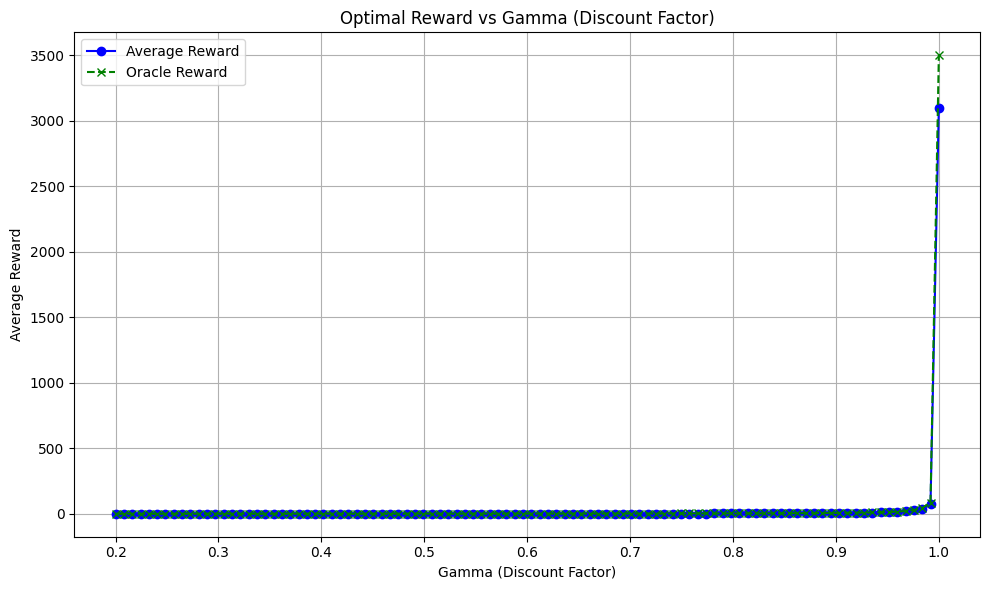

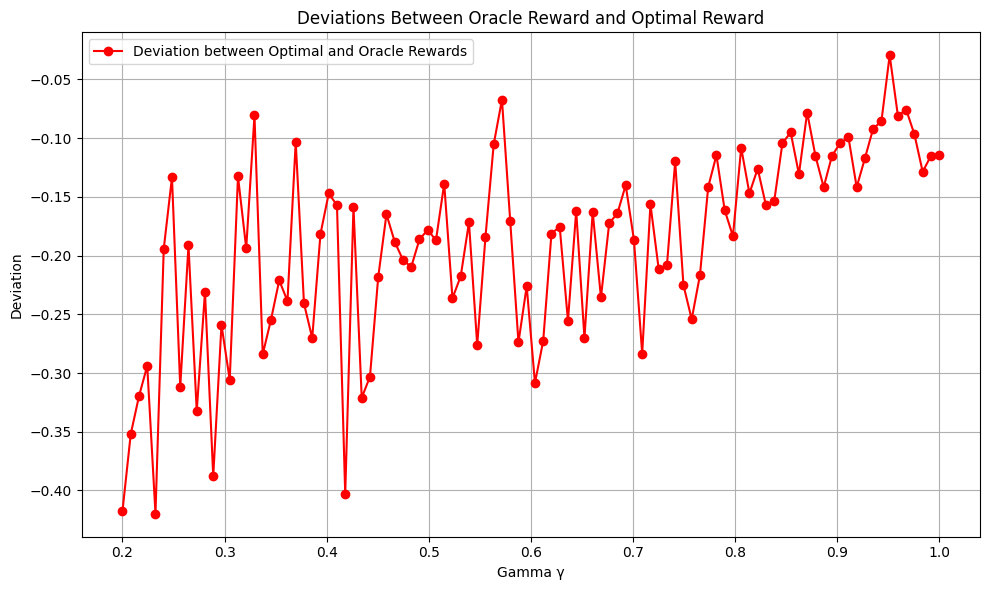

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def compute_expected_reward(p, R_success, R_fail, gamma):
    return p * (1.0 + gamma * R_success) + (1.0 - p) * (gamma * R_fail)

def solve_2armed_bandit_dp(M=10, gamma=0.95, tol=1e-8, max_iter=50):
    R = np.ones((M+1, M+1, M+1, M+1), dtype=np.float64) * 0.5
    policy = np.zeros((M+1, M+1, M+1, M+1), dtype=int)
    
    def clamp(x, M):
        return min(x, M)

    for _ in range(max_iter):
        delta = 0.0
        for alpha1 in range(1, M+1):
            for beta1 in range(1, M+1):
                for alpha2 in range(1, M+1):
                    for beta2 in range(1, M+1):
                        p1 = alpha1 / (alpha1 + beta1)
                        R_success_1 = R[clamp(alpha1 + 1, M), beta1, alpha2, beta2]
                        R_fail_1 = R[alpha1, clamp(beta1 + 1, M), alpha2, beta2]
                        R1 = compute_expected_reward(p1, R_success_1, R_fail_1, gamma)
                        
                        p2 = alpha2 / (alpha2 + beta2)
                        R_success_2 = R[alpha1, beta1, clamp(alpha2 + 1, M), beta2]
                        R_fail_2 = R[alpha1, beta1, alpha2, clamp(beta2 + 1, M)]
                        R2 = compute_expected_reward(p2, R_success_2, R_fail_2, gamma)

                        new_val = max(R1, R2)
                        old_val = R[alpha1, beta1, alpha2, beta2]
                        diff = abs(new_val - old_val)
                        if diff > delta:
                            delta = diff
                        R[alpha1, beta1, alpha2, beta2] = new_val

                        if R1 > R2:
                            policy[alpha1, beta1, alpha2, beta2] = 0
                        else:
                            policy[alpha1, beta1, alpha2, beta2] = 1

        if delta < tol:
            break
    return R, policy

def simulate_trial(policy, M, true_theta, alpha_prior, beta_prior, gamma, time_steps):
    alpha = [alpha_prior[0], alpha_prior[1]]
    beta = [beta_prior[0], beta_prior[1]]
    total_reward = 0.0
    current_gamma_power = 1.0

    for _ in range(1, time_steps + 1):
        a1 = min(alpha[0], M)
        a2 = min(alpha[1], M)
        b1 = min(beta[0], M)
        b2 = min(beta[1], M)

        action = policy[a1, b1, a2, b2]
        success = np.random.rand() < true_theta[action]
        if success:
            total_reward += current_gamma_power
            alpha[action] += 1
        else:
            beta[action] += 1

        current_gamma_power *= gamma

    return total_reward


def run_simulation(gamma_values, M, true_theta, alpha_prior, beta_prior, time_steps, repeat_time):
    results = []
    oracle_rewards = []
    deviations = []
    
    for gamma in gamma_values:
        # Solve DP and get the optimal policy
        R, policy = solve_2armed_bandit_dp(M, gamma)
        
        # Simulate multiple trials
        total_rewards = np.zeros(repeat_time, dtype=np.float64)
        for trial in range(1, repeat_time + 1):
            reward = simulate_trial(policy, M, true_theta, alpha_prior, beta_prior, gamma, time_steps)
            total_rewards[trial - 1] = reward
        
        average_reward = np.mean(total_rewards)
        results.append((gamma, average_reward))
        
        # Calculate oracle reward
        oracle_reward_sum = 0
        for _ in range(repeat_time):
            if gamma < 1.0:
                oracle_reward = max(true_theta) * (1 - gamma**time_steps) / (1 - gamma)
            else:
                oracle_reward = max(true_theta) * time_steps
            oracle_reward_sum += oracle_reward
        oracle_rewards.append(oracle_reward_sum / repeat_time)

    gamma_evaluated, avg_rewards = zip(*results)
    gamma_evaluated = np.array(gamma_evaluated)
    avg_rewards = np.array(avg_rewards)
    oracle_rewards = np.array(oracle_rewards)
    
    # Calculate deviations
    deviations = (avg_rewards - oracle_rewards) / oracle_rewards

    return gamma_evaluated, avg_rewards, oracle_rewards, deviations

def plot_results(gamma_evaluated, avg_rewards, oracle_rewards, deviations):
    plt.figure(figsize=(10, 6))
    plt.plot(gamma_evaluated, avg_rewards, marker='o', color='blue', label='Average Reward')
    plt.plot(gamma_evaluated, oracle_rewards, marker='x', linestyle='--', color='green', label="Oracle Reward")
    plt.title('Optimal Reward vs Gamma (Discount Factor)')
    plt.xlabel('Gamma (Discount Factor)')
    plt.ylabel('Average Reward')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(gamma_evaluated, deviations, marker='o', linestyle='-', color='red', label="Deviation between Optimal and Oracle Rewards")
    plt.title('Deviations Between Oracle Reward and Optimal Reward')
    plt.xlabel('Gamma γ')
    plt.ylabel('Deviation')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def main():
    M = 10
    gamma_values = np.linspace(0.2, 1, 100)
    true_theta = [0.7, 0.5]
    time_steps = 5000
    repeat_time = 20
    gamma_evaluated, avg_rewards, oracle_rewards, deviations = run_simulation(gamma_values, M, true_theta, [1, 1], [1, 1], time_steps, repeat_time)
    plot_results(gamma_evaluated, avg_rewards, oracle_rewards, deviations)

if __name__ == "__main__":
    main()


The total expected reward from an infinite sequence of pulls, given the current state of the system $ (\alpha_1, \beta_1, \alpha_2, \beta_2) $, is governed by the following Bellman equation:
$$
R(\alpha_1, \beta_1, \alpha_2, \beta_2) = \max \{ R_1(\alpha_1, \beta_1), R_2(\alpha_2, \beta_2) \}
$$
where $ R_1(\alpha_1, \beta_1) $ and $ R_2(\alpha_2, \beta_2) $ represent the expected future rewards of pulling arm 1 or arm 2, respectively.


The recursive nature of the problem means that the optimal reward at each time step depends on the future rewards, which in turn depend on the posterior beliefs about the success probabilities of each arm. To solve this, we need to compute the future reward $ R_1(\alpha_1, \beta_1) $ and $ R_2(\alpha_2, \beta_2) $ for each arm.

- **Pulling Arm 1**: When you pull arm 1, you update the parameters $ \alpha_1 $ and $ \beta_1 $ based on whether the outcome was a success or failure. A success increases $ \alpha_1 $, while a failure increases $ \beta_1 $. Once these parameters are updated, you can compute the expected future reward for pulling arm 1.
  
- **Pulling Arm 2**: Similarly, pulling arm 2 leads to an update in $ \alpha_2 $ and $ \beta_2 $ based on the outcome. The expected future reward for pulling arm 2 is then calculated based on these updated parameters.

The total expected reward for each state is then determined by comparing the expected rewards of pulling arm 1 versus arm 2, and choosing the arm that maximizes the expected future reward.

The Bellman equation ensures that, at each time step, the decision to pull arm 1 or arm 2 is based on the optimal expected future rewards, considering both the current state and the future potential outcomes.

To solve this problem efficiently, we need to handle the continuous state space defined by the parameters $(\alpha_1, \beta_1, \alpha_2, \beta_2) $. Since these parameters are continuous, evaluating every possible state is computationally impractical. Therefore, we discretize the parameter space by dividing each of $\alpha_1, \beta_1, \alpha_2, \beta_2 $ into a finite number of discrete values.

The reason we use dynamic programming at this point is that it allows us to systematically compute the optimal policy despite the large number of potential states. By discretizing the space, we reduce the continuous problem to a finite state space, making it possible to apply dynamic programming techniques. Dynamic programming ensures that, at each time step, we can efficiently calculate the optimal expected reward for each state, taking into account both the current state and the potential future outcomes. This method avoids the curse of dimensionality and allows us to handle the complexity of the problem, providing a computationally feasible approach while still ensuring a close approximation of the optimal solution.

In order to solve this problem using dynamic programming, we need to deal with the continuous state space defined by the parameters $ (\alpha_1, \beta_1, \alpha_2, \beta_2) $. Since these parameters are continuous, it’s impractical to evaluate every possible state. Therefore, we discretize the parameter space by dividing each of $ \alpha_1, \beta_1, \alpha_2, \beta_2 $ into a finite number of discrete values.

Once the state space has been discretized, we can use dynamic programming to compute the optimal policy and the expected total reward. Dynamic programming functions in the following ways:

1. **State Recursion**: At each time step, the expected future reward is computed based on the current state (e.g., the arm parameters $ \alpha_1, \beta_1, \alpha_2, \beta_2 $). Dynamic programming recursively calculates the optimal expected reward for each state, ensuring that the best decision is made at each step.

2. **Global Optimality**: By processing all possible states, dynamic programming ensures that the chosen strategy is globally optimal. Even in the case of an infinite sequence of pulls, dynamic programming guarantees that the accumulation of locally optimal decisions leads to the best overall total reward.

3. **Avoiding Redundant Calculations**: Dynamic programming saves the computed results for each state, avoiding repeated calculations for the same state and improving efficiency. This is especially important when the state space is large, as the memoization technique of dynamic programming can significantly reduce the computation time.
